<a href="https://colab.research.google.com/github/MathewsJosh/Fundamentos-Mecanica-Estruturas/blob/main/%5BMAC019%5D_Trabalho_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P2: Segunda Avaliação de Conhecimentos   

Grupo: B2<br>
Brian Luís Coimbra Maia<br>
Mathews Edwirds Gomes Almeida<br>
Raíssa Guimarães de Castro<br>
Daniel Possato Juliaci <br>
<br>
Responsável pela entrega:<br>
Brian Luís Coimbra Maia<br>
<br>
Data de formação da equipe:<br>
19/07/21<br>

# Condições Gerais

Essa tarefa tem como objetivo avaliar os conhecimentos adquiridos durante a disciplina de Fundamentos de Mecânica das Estruturas.


As condicões abaixo devem ser observadas: 

1. Serão formadas equipes e cada uma delas com até e 4 integrantes. 

2. A avaliação será realizada por meio da entrega de um vídeo explicativo e de
códigos desenvolvidos até a data estipulada. 

3. Os documentos necessários para a entrega do trabalho são (1) um vídeo com
a descricão da solução e (2) os códigos desenvolvidos pela equipe. Os vídeos podem ser separados por questão, porém o tempo somado de todos os vídeos não deve ultrapassar **12** minutos. A equipe deve usar este modelo de notebook para desenvolver os códigos.

4. A distribuição da pontuacão referente a cada ítem aparece no enunciado de 
cada proposicão.

4. Um dos integrantes será indentificado como responsável pela entrega do documentos necessários.

6. As equipes devem ser formadas até às **18 horas o dia 23/07/2021** por meio do preenchimento da planilha [[MAC019] Formação das Equipes](https://docs.google.com/spreadsheets/d/1XhCWfpfDqR951V5RHR1aS_dBhocfzFNLdZe8NpCO-Ng/edit#gid=153704268).

7. A formação das equipes pode ser acompanhada arquivo [[MAC019] Formação das Equipes](https://docs.google.com/spreadsheets/d/1XhCWfpfDqR951V5RHR1aS_dBhocfzFNLdZe8NpCO-Ng/edit#gid=153704268). Cada equipe será indentificada por uma letra em ordem alfabética seguida do número 2 (A2, B2, C2, e assim por diante). O arquivo está aberto para edição e pode ser alterado pelos alunos até a data estipulada.

8. Equipes formadas após a data estabelecida para a formação das equipes terão a nota da avaliação multiplicada por um coeficiente de **0.80**.

9. A equipe deve indicar no arquivo [[MAC019] Formação das Equipes](https://docs.google.com/spreadsheets/d/1XhCWfpfDqR951V5RHR1aS_dBhocfzFNLdZe8NpCO-Ng/edit#gid=153704268) um responsável pela entrega do projeto. 


10. A entrega dos projetos (videos explicativos e códigos) deve ocorrer até às **23:59 do dia 06/08/2021** na plataforma da disciplina pelo responsável pela entrega. **Os arquivos devem ser compartilhados com leonardo.goliatt@ufjf.br** 

11. Quaiquer dúvidas ou esclarecimentos devem ser encaminhadas pela sala de aula virtual.



## Instalação dos pacotes

Nesta aula vamos usar o pacote sympy/Beam (computação simbólica) e compará-lo com o pacote beambending

In [ ]:
!pip install beambending
!pip install anastruct
!pip install sympy

In [ ]:
# importando os pacotes necessários
import numpy as np
import matplotlib.pyplot as plt
from anastruct import SystemElements
from termcolor import colored

# Questão 1 (20 pontos)

Apresente um modelo computacional para o pórtico abaixo. 
A carga distribuída tem o valor de 12 kN/m. A distância entre os pontos $A$ e $B$ é de 3 metros a a distância horizontal entre os apoios é de 4 metros.

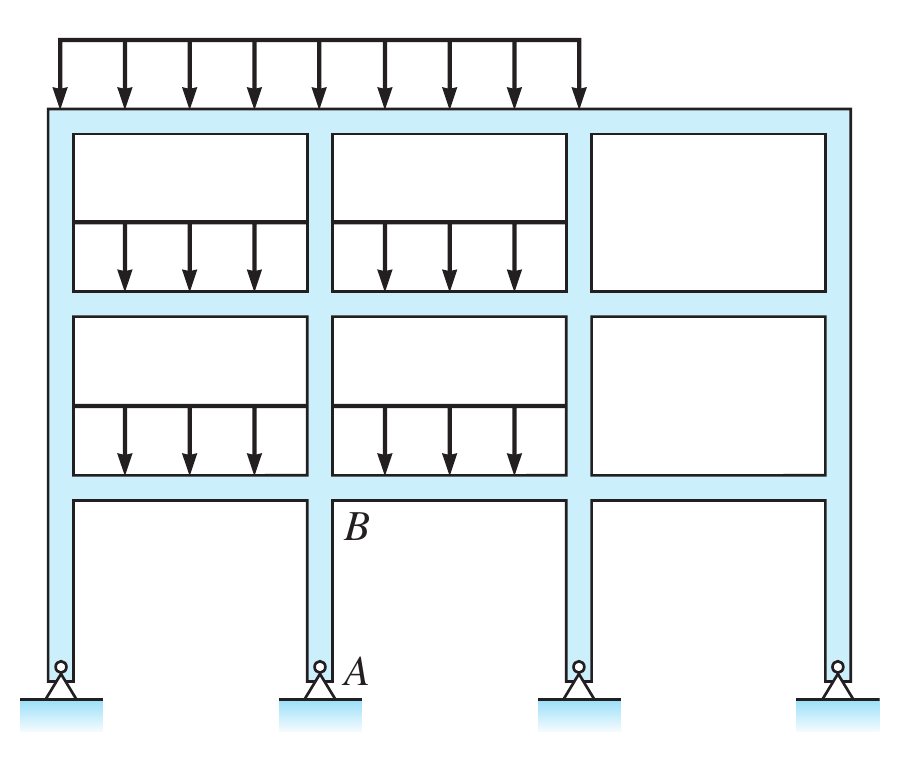

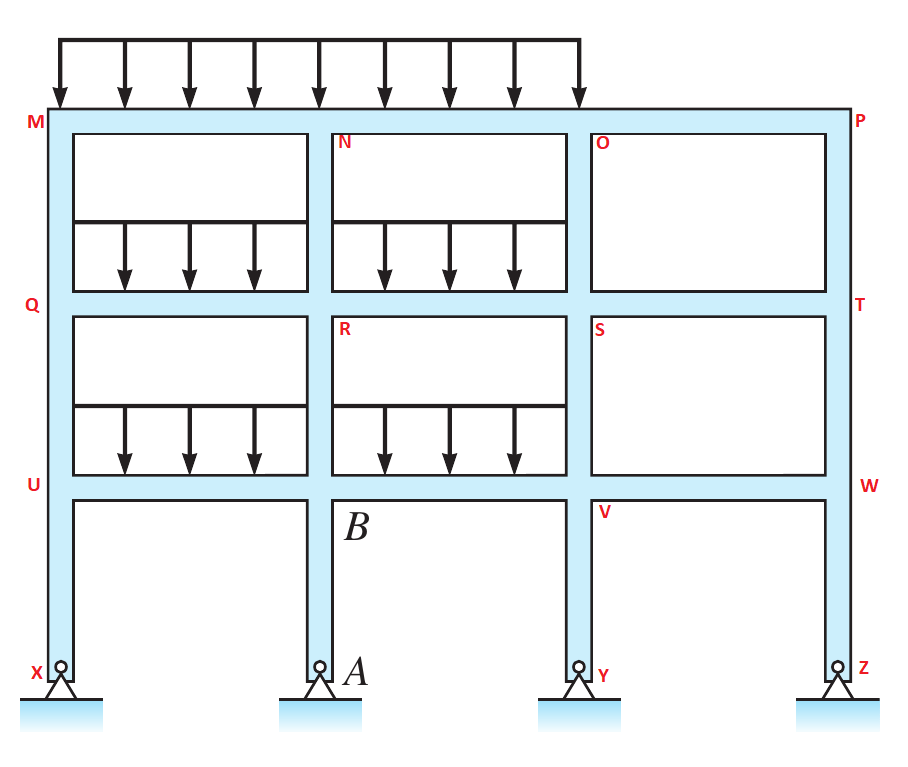

In [ ]:
#-------------------------------------------------------------------------------
# Informações da estrutura
#-------------------------------------------------------------------------------
node={"M":(0, 9), "N":(4, 9), "O":(8, 9), "P":(12, 9),
      "Q":(0, 6), "R":(4, 6), "S":(8, 6), "T":(12, 6),
      "U":(0, 3), "B":(4, 3), "V":(8, 3), "W":(12, 3), 
      "X":(0, 0), "A":(4, 0), "Y":(8, 0), "Z":(12, 0)}

# Define as conectividades entre os nós
conec=[('M', 'N'), ('N', 'O'), ('Q', 'R'), ('R', 'S'), ('U', 'B'), ('B', 'V'), 
       ('M', 'Q'), ('N', 'R'), ('O', 'P'), ('O', 'S'), ('P', 'T'),
       ('Q', 'U'), ('R', 'B'), ('S', 'T'), ('S', 'V'), ('T', 'W'),
       ('U', 'X'),  ('B', 'A'), ('V', 'W'), ('V', 'Y'), ('W', 'Z')]

#-------------------------------------------------------------------------------
# Montagem do modelo estrutural
#-------------------------------------------------------------------------------
#  Instancia o sistema estrutural
ss = SystemElements()

# Implementa a conectividade entre os nós gerando os elementos ou "membros"
for e in conec:
  element = (node[e[0]], node[e[1]])
  ss.add_element(location = element)    # Add um elemento comum entre cada nó conectado

# carregamentos distribuídos
ss.q_load(element_id=[1,2], q=-12, direction='y')
ss.q_load(element_id=3, q=-12, direction='y')
ss.q_load(element_id=4, q=-12, direction='y')
ss.q_load(element_id=5, q=-12, direction='y')
ss.q_load(element_id=6, q=-12, direction='y')

# apoios
node_id = ss.find_node_id(node['X'])
ss.add_support_hinged(node_id=node_id)
node_id = ss.find_node_id(node['A'])
ss.add_support_hinged(node_id=node_id)
node_id = ss.find_node_id(node['Y'])
ss.add_support_hinged(node_id=node_id)
node_id = ss.find_node_id(node['Z'])
ss.add_support_hinged(node_id=node_id)
 
#-------------------------------------------------------------------------------
# Solução e resultados do sistema estrutural
#-------------------------------------------------------------------------------
ss.solve()

ss.show_structure(scale=0.7, figsize=(10,7), offset=(0,0))
ss.show_reaction_force(scale=0.9, figsize=(10,7), offset=(0,1))
ss.show_axial_force(scale=0.7, figsize=(10,7), offset=(0,0))
ss.show_shear_force(scale=0.7, figsize=(10,7), offset=(0,0))
ss.show_bending_moment(scale=0.7, figsize=(10,7), offset=(0,0))
ss.show_displacement(scale=0.7, figsize=(10,7), offset=(0,0))

# Questão 2 (20 pontos)

Apresente os diagramas de esforços para a estrutura abaixo.

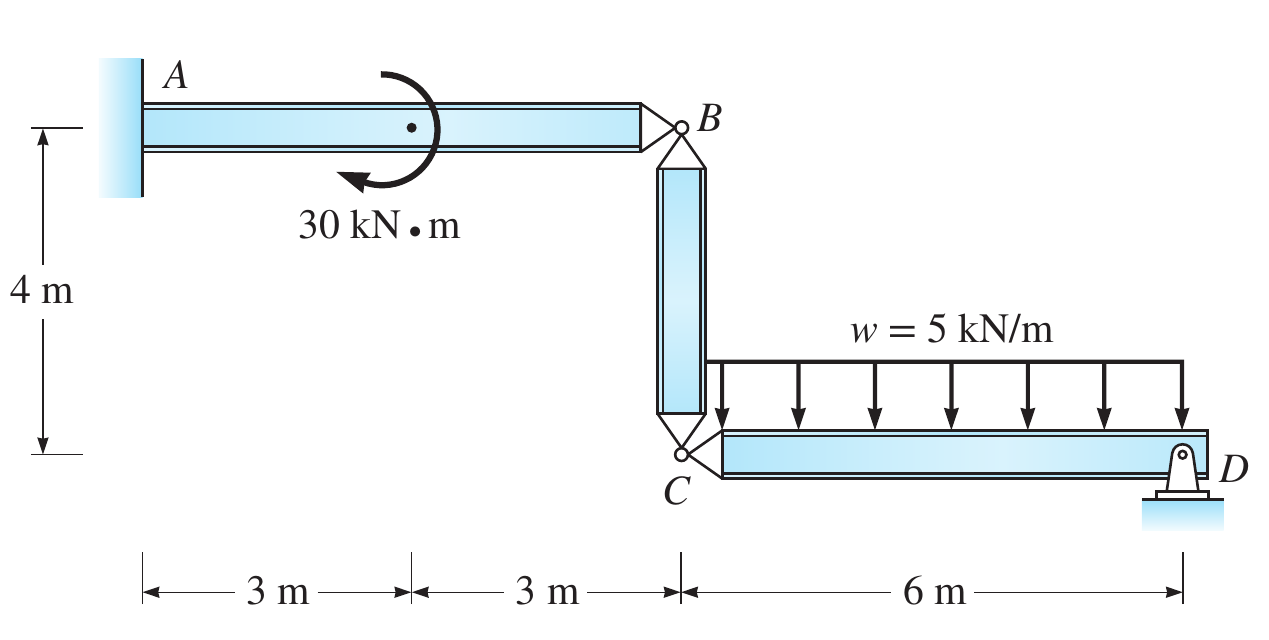

In [ ]:
#-------------------------------------------------------------------------------
# Informações da estrutura
#-------------------------------------------------------------------------------
node={"A":(0, 4), 'E':(3,4), "B":(6, 4), "C":(6, 0), "D":(12, 0)}

# Define as conectividades entre os nós
conec=[('A', 'E'), ('E','B'), ('B', 'C'), ('C', 'D')]

concentrated_load = {'E':(0,0,-30)} 

#-------------------------------------------------------------------------------
# Montagem do modelo estrutural
#-------------------------------------------------------------------------------
#  Instancia o sistema estrutural
ss = SystemElements()

# Implementa a conectividade entre os nós gerando os elementos ou "membros"
ss.add_element(location=[node['A'], node['E']])
ss.add_element(location=[node['E'], node['B']])
ss.add_element(location=[node['B'], node['C']], spring={1:0, 2:0})  # Rótulas
ss.add_element(location=[node['C'], node['D']], spring={1:0}) # Rótulas

# Carregamentos concentrados
for l in concentrated_load:
  fx, fy, mz = concentrated_load[l]
  node_id = ss.find_node_id(node[l])
  if fx!=0 or fy!=0: 
    ss.point_load(node_id=node_id, Fx=fx, Fy=fy)
  if mz!=0:
    ss.moment_load(node_id=node_id, Ty=mz)

# Carregamentos distribuídos
ss.q_load(element_id=4, q=-5, direction='y')

# Apoios
node_idA = ss.find_node_id(node['A'])
ss.add_support_fixed(node_id=node_idA)   #engaste
node_idD = ss.find_node_id(node['D'])
ss.add_support_hinged(node_id=node_idD)

#-------------------------------------------------------------------------------
# Solução e resultados do sistema estrutural
#-------------------------------------------------------------------------------
ss.solve()

ss.show_structure(scale=0.7, figsize=(8,4), offset=(0,0))
ss.show_reaction_force(scale=0.9, figsize=(8,4), offset=(0,1))
ss.show_axial_force(scale=0.7, figsize=(8,4), offset=(0,0))
ss.show_shear_force(scale=0.7, figsize=(8,4), offset=(0,0))
ss.show_bending_moment(scale=0.7, figsize=(8,4), offset=(0,0))
ss.show_displacement(scale=0.7, figsize=(8,4), offset=(0,0))

# Questão 3 (20 pontos)

A viga abaixo suporta o carregamento indicado. Determine o valor de $x$ que minimize o momento máximo $M_{max}$ na viga. Especifique o valor de $M_{max}$.

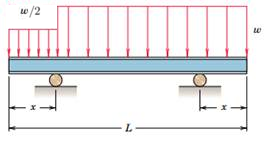

In [ ]:
#-------------------------------------------------------------------------------
# Informações da estrutura
#-------------------------------------------------------------------------------
comprimento = 8
salto = 0.1
intervalo = np.arange(0.5, comprimento/2, salto)
carregamento = 20

lista_momentos = []
#-------------------------------------------------------------------------------
# Montagem do modelo estrutural
#-------------------------------------------------------------------------------
for i in intervalo:
  node={'A':[0,0], 'B':[i,0], 'C':[comprimento-i,0], 'D':[comprimento,0]}
  
  # instancia o sistema estrutural
  ss = SystemElements()

  # conexão dos nós
  ss.add_element(location=[node['A'], node['B'], ], spring={})
  ss.add_element(location=[node['B'], node['C'], ], spring={})
  ss.add_element(location=[node['C'], node['D'], ], spring={})

  # carregamentos distribuídos
  ss.q_load(element_id=1, q=-carregamento/2, direction='y')
  ss.q_load(element_id=2, q=-carregamento, direction='y')
  ss.q_load(element_id=3, q=-carregamento, direction='y')

  # apoios
  node_id = ss.find_node_id(node['B'])
  ss.add_support_hinged(node_id=node_id)
  node_id = ss.find_node_id(node['C'])   
  ss.add_support_hinged(node_id=node_id)

  #-------------------------------------------------------------------------------
  # Solução do sistema estrutural
  #-------------------------------------------------------------------------------
  ss.solve()
  print("intervalo =", i)
  lista_momentos.append(ss.get_element_result_range('moment')[2])
  print("Momentos: " + str(ss.get_element_result_range('moment')))
  #print(ss.get_element_results())
  #-------------------------------------------------------------------------------
  #ss.show_structure()
  #ss.show_reaction_force()
  ss.show_bending_moment(scale=0.8, figsize=(8,3), offset=(0,0))

print(colored("\n\nO valor de x que gera o menor momento maximo é: " + str(intervalo[min(lista_momentos).argmin()]),'green'))
print(colored("O menor momento máximo é: " + str(min(lista_momentos)),'green'))

# Questão 4 (40 pontos)

Determine o valor a posição do momento máximo _positivo_ na ponte causado pela passagem do veiculo.

Durante o processo de modelagem justifique as escolhas realizadas para encontrar a solução.

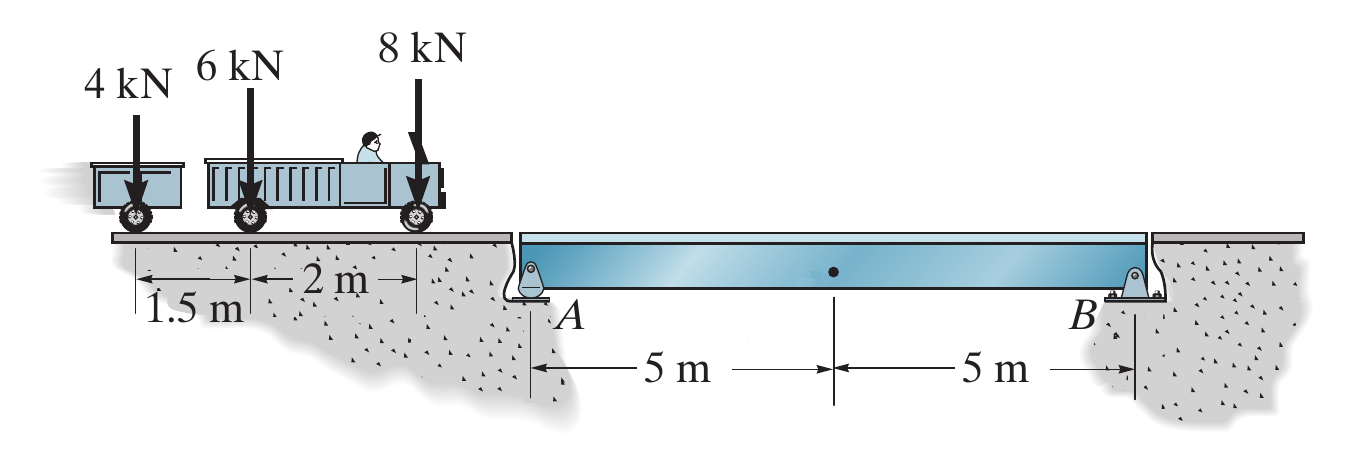

In [ ]:
from sympy.physics.continuum_mechanics.beam import Beam
from sympy import symbols
import numpy as np

movimento = np.arange(0, 13, 1.7)#(0, 13, 1.7) # Arranjo feito convenientemente para fazer a aplicação das forças ao longo da ponte
max_momentos = [] # Lista para salvar todos os momentos máximos encontrados a cada iteração
max_posicoes = [] # Lista para salvar todos as posições que geram momentos máximos

# Laço para movimentar as forças aplicadas pelo carrinho ao longo da ponte
for m in movimento:
  A, B = symbols('A, B')
  b = Beam(10, A, B)

  # Aplicando os apoios
  b.apply_support(loc=0, type='roller')
  b.apply_support(loc=10, type='pin')

  # Aplicando as forças
  b.apply_load(value=8, start=m, order=-1)
  b.apply_load(value=6, start=m-2, order=-1)
  b.apply_load(value=4, start=m-3.5, order=-1)

  # Exibindo a figura com a barra, apoios e forças aplicadas
  p = b.draw()
  p.show()

  # Utilizando função para resolver as forças de reação
  R_0, R_10 = symbols('R_0, R_10')
  b.solve_for_reaction_loads(R_0, R_10)

  # Utilizando a função max_bmoment() que retorna o momento máximo gerado e a coordenada em que isso ocorre na ponte
  x = b.max_bmoment()
  max_momentos.append(x[1])
  max_posicoes.append(x[0])

  # Printa momento máximo e coordenadas em que as forças estão sendo aplicadas a cada iteração
  print("Momento máximo: " + str(x))
  print("Coordenadas: " + str(m) + " " + str(m-2) + " " + str(m-3.5))
  
  # Plota gráfico de momentos
  b.plot_bending_moment()

print("Momento máximo encontrado durante o deslocamento do carrinho na ponte: " + str(np.amax(max_momentos)) + " kN.m")
print("Posição em que o momento máximo foi encontrado: " + str(max_posicoes[max_momentos.index(np.amax(max_momentos))]))